In [1]:
pwd

'/home/masoud/Desktop/projects/volleyball_analytics/notebooks'

In [2]:
cd ..

/home/masoud/Desktop/projects/volleyball_analytics


/home/masoud/anaconda3/envs/p/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [21]:
from pathlib import Path
import os
import cv2
import json
import yaml
import numpy as np
from src.ml.yolo.volleyball_object_detector import VolleyBallObjectDetector
import  matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 12]

In [38]:
court_json = '/home/masoud/Desktop/projects/volleyball_analytics/conf/court.json'
video = '/home/masoud/Desktop/projects/volleyball_analytics/data/raw/videos/train/10.mp4'

config = json.load(open(court_json))
config = config['11.mp4']

In [39]:
config


{'main_zone': [[410, 620], [1500, 620], [1830, 1040], [80, 1040]],
 'front_zone': [[170, 715], [1750, 715], [1850, 850], [80, 850]]}

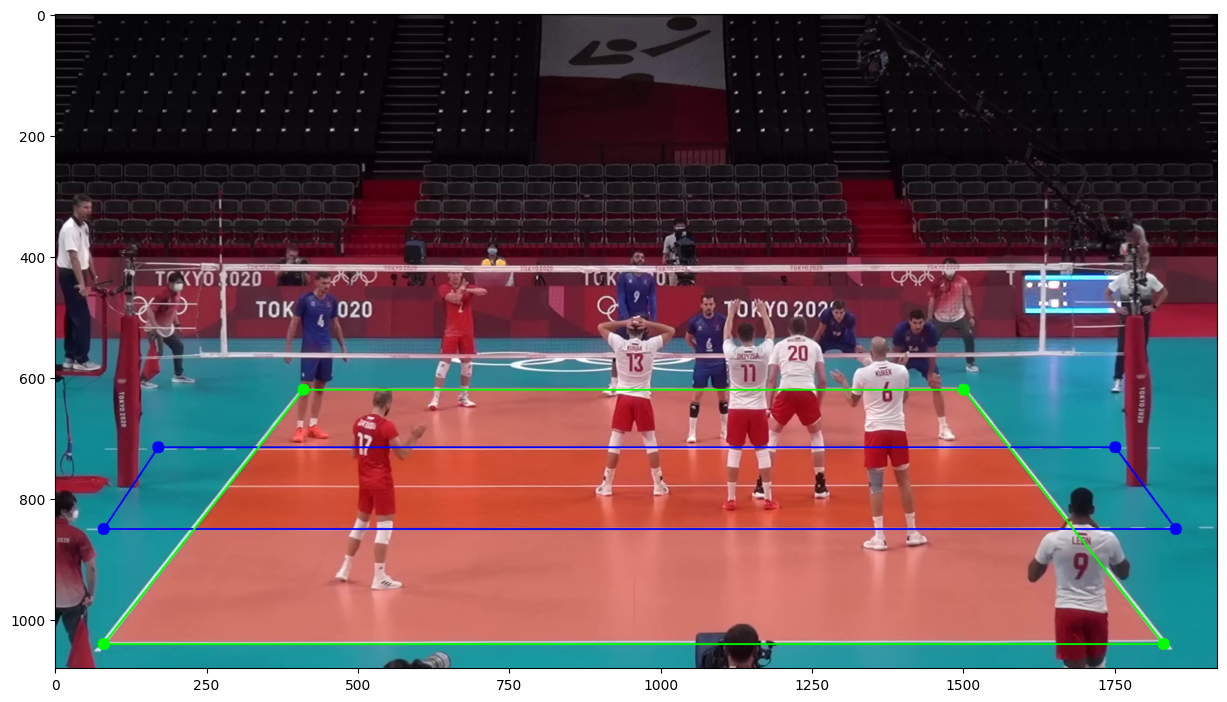

In [40]:
cap = cv2.VideoCapture(video)
status, frame = cap.read()
frame = cv2.cvtColor(frame, 4)



mtl = config['main_zone'][0]
mtr = config['main_zone'][1]
mbr = config['main_zone'][2]
mbl = config['main_zone'][3]

ftl = config['front_zone'][0]
ftr = config['front_zone'][1]
fbr = config['front_zone'][2]
fbl = config['front_zone'][3]


for pt in [mtl, mtr, mbr, mbl]:
    cv2.circle(frame, tuple(pt), 10, (0, 255, 0), -2)

for pt in [ftl, ftr, fbr, fbl]:
    cv2.circle(frame, tuple(pt), 10, (0, 0, 255), -2)

front_zone = np.array(config['front_zone'], np.int32).reshape((-1, 1, 2))
cv2.polylines(frame, [front_zone], True, (0, 0, 255), 2)

main_zone = np.array(config['main_zone'], np.int32).reshape((-1, 1, 2))
cv2.polylines(frame, [main_zone], True, (0, 255, 0), 2)

plt.imshow(frame)

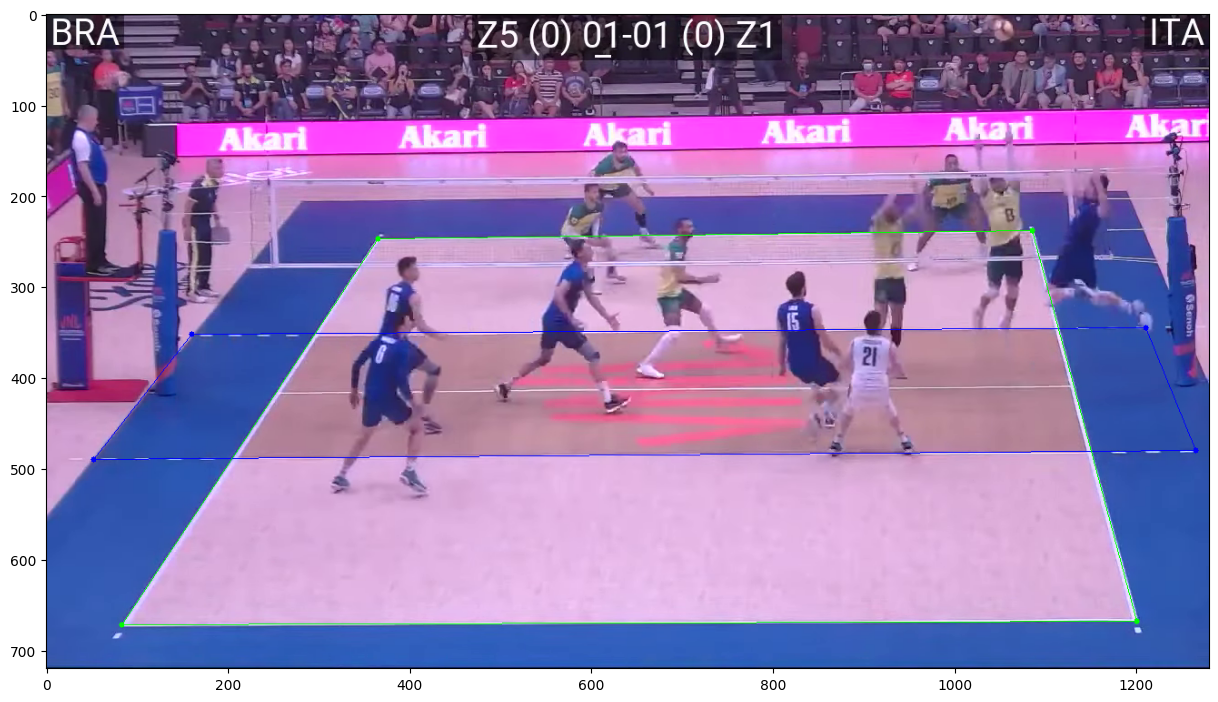

In [298]:


# court_json = '/home/masoud/Desktop/projects/volleyball_analytics/conf/court.json'
video = '/home/masoud/Desktop/projects/volleyball_analytics/data/raw/videos/train/9.webm'

config = {
    "main_zone": [[365, 247], [1085, 238], [1200, 668], [83, 672]],
    "front_zone": [[160, 352], [1210, 345], [1265, 480], [52, 490]]
}

cap = cv2.VideoCapture(video)
cap.set(1, 900)
status, frame = cap.read()
frame = cv2.cvtColor(frame, 4)

mtl = config['main_zone'][0]
mtr = config['main_zone'][1]
mbr = config['main_zone'][2]
mbl = config['main_zone'][3]

ftl = config['front_zone'][0]
ftr = config['front_zone'][1]
fbr = config['front_zone'][2]
fbl = config['front_zone'][3]


for pt in [mtl, mtr, mbr, mbl]:
    cv2.circle(frame, tuple(pt), 3, (0, 255, 0), -2)

for pt in [ftl, ftr, fbr, fbl]:
    cv2.circle(frame, tuple(pt), 3, (0, 0, 255), -2)

front_zone = np.array(config['front_zone'], np.int32).reshape((-1, 1, 2))
cv2.polylines(frame, [front_zone], True, (0, 0, 255), 1)

main_zone = np.array(config['main_zone'], np.int32).reshape((-1, 1, 2))
cv2.polylines(frame, [main_zone], True, (0, 255, 0), 1)

plt.imshow(frame)



In [42]:
frame.shape

(720, 1280, 3)